Mounted at /content/drive
Found 384 images belonging to 4 classes.
Found 100 images belonging to 4 classes.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
12/12 [==============================] - 129s 10s/step - loss: 1.5904 - accuracy: 0.2682 - val_loss: 1.3128 - val_accuracy: 0.3542
Epoch 2/10
12/12 [==============================] - 99s 8s/step - loss: 1.3864 - accuracy: 0.3255 - val_loss: 1.3162 - val_accuracy: 0.4167
Epoch 3/10
12/12 [==============================] - 99s 8s/step - loss: 1.3711 - accuracy: 0.3490 - val_loss: 1.2326 - val_accuracy: 0.3958
Epoch 4/10
12/12 [==============================] - 99s 8s/step - loss: 1.3711 - accuracy: 0.3411 - val_loss: 1.2128 - val_accuracy: 0.6354
Epoch 5/10
12/12 [==============================] - 101s 8s/step - loss: 1.3195 - accuracy: 0.3906 - val_loss: 1.3576 - val_accuracy: 0.4062
Epoch 6/10
12/12 [==============================] - 101s 8s/step - loss: 1.2533 - accuracy: 0.4375 - val_loss: 1.1618 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


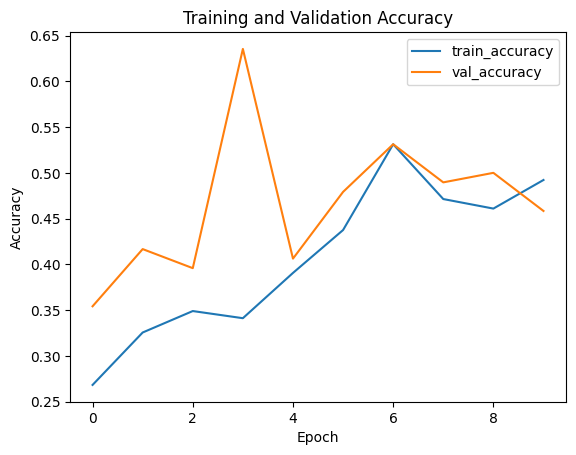

4/4 [==============================] - 19s 4s/step - loss: 1.0807 - accuracy: 0.4600
Test Accuracy: 0.46000000834465027


In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
train_data_dir = '/content/drive/MyDrive/dataset/training_data'
test_data_dir = '/content/drive/MyDrive/dataset/testing_data'

# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Save the model
model.save('/content/drive/MyDrive/resnet_model.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)


In [ ]:
# Save the model
model.save('/content/drive/MyDrive/resnet_model.h5')